# Análise de dados -  Fraude cartão credito

![](img/1353.jpg)

<a href="https://br.freepik.com/vetores-gratis/pagina-de-destino-isometrica-de-seguranca-de-cartao-de-credito-robo_7588634.htm#query=machine%20learning%20credit&position=35&from_view=search&track=ais&uuid=f564bf38-b380-4976-b5b7-ef8c82b91fa6">Imagem de upklyak</a> no Freepik

In [2]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
palette='viridis'

plt.rcParams["figure.figsize"] = (20, 10)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 15
m.rcParams['xtick.labelsize'] = 15
m.rcParams['ytick.labelsize'] = 15
m.rcParams['text.color'] = 'k'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print()
print('Versão python neste Jupyter Notebook:', python_version())
print()

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions


Versão python neste Jupyter Notebook: 3.8.18

Author: Versões das bibliotecas

re        : 2.2.1
plotly    : 5.18.0
pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.6.0
numpy     : 1.24.4
watermark : 2.4.3



# Dataset

In [3]:
# Carregando dataset
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Visualizando 5 primeiros dados
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Visualizando os 5 últimos dados
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Visualizando linhas e colunas 
data.shape

(284807, 31)

In [7]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Durante a exposição das informações iniciais de cada variável, pudemos identificar aspectos cruciais da amostra. Observamos que, aparentemente, não há dados faltantes na análise. Além disso, constatamos que todas as variáveis numéricas foram devidamente reconhecidas como float, o que sugere uma qualidade consistente e confiável nos dados disponíveis para análise.

Ao analisar as informações iniciais de cada variável, observamos que aparentemente não há dados faltantes na amostra. Além disso, todas as variáveis numéricas foram corretamente identificadas como float, demonstrando a qualidade e integridade dos dados disponíveis para análise.

In [8]:
# Visualizando dados estatisticos com função T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
# Visualizando dados estatisticos
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Durante a observação inicial, notamos que o conjunto de dados contém quase 285 mil transações, proporcionando uma base substancial para análise. Além disso, destacamos que o valor médio das transações é de aproximadamente 88 dólares, fornecendo um panorama inicial do padrão de gastos ou transações presentes no conjunto de dados.

In [10]:
# Verificando existência de elementos nulos e NaNs
data.isna().sum().max()
data.isnull().sum().max()

0

# 1.Análise exploratoria dados

Durante a análise, verificamos a inexistência de elementos nulos ou do tipo NaN nos dados. Essa constatação é significativa, pois nos isenta da necessidade de substituir esses valores ausentes por medidas alternativas, como a mediana, por exemplo. Esta qualidade dos dados nos permite avançar diretamente para etapas subsequentes da análise sem a etapa de imputação de valores faltantes.

Determinamos a quantidade de transações presentes nos dados, classificando-as entre aquelas identificadas como fraudulentas e não fraudulentas. Essa segmentação nos permite uma compreensão mais aprofundada da distribuição dessas transações e fornece insights valiosos sobre a incidência de fraudes dentro do conjunto de dados analisado.

In [11]:
print('Transacoes sem fraude:', data['Class'].value_counts()[0])
print('Transacoes com fraude:', data['Class'].value_counts()[1])
print()
print('Transacoes sem fraude:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% da amostra simples')
print('Transacoes com fraude:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% da amostra simples')

Transacoes sem fraude: 284315
Transacoes com fraude: 492

Transacoes sem fraude: 99.83 % da amostra simples
Transacoes com fraude: 0.17 % da amostra simples


Analisando o conjunto de transações registrado, identificamos que apenas 492 foram categorizadas como fraudulentas, representando meramente 0,17% do total da amostra. Essa constatação evidencia um desequilíbrio significativo nos dados, onde a incidência de fraudes é consideravelmente baixa em comparação com as transações não fraudulentas. Este desbalanceamento impacta diretamente na modelagem e pode requerer técnicas específicas para lidar com essa disparidade durante a construção do modelo de aprendizado de máquina.

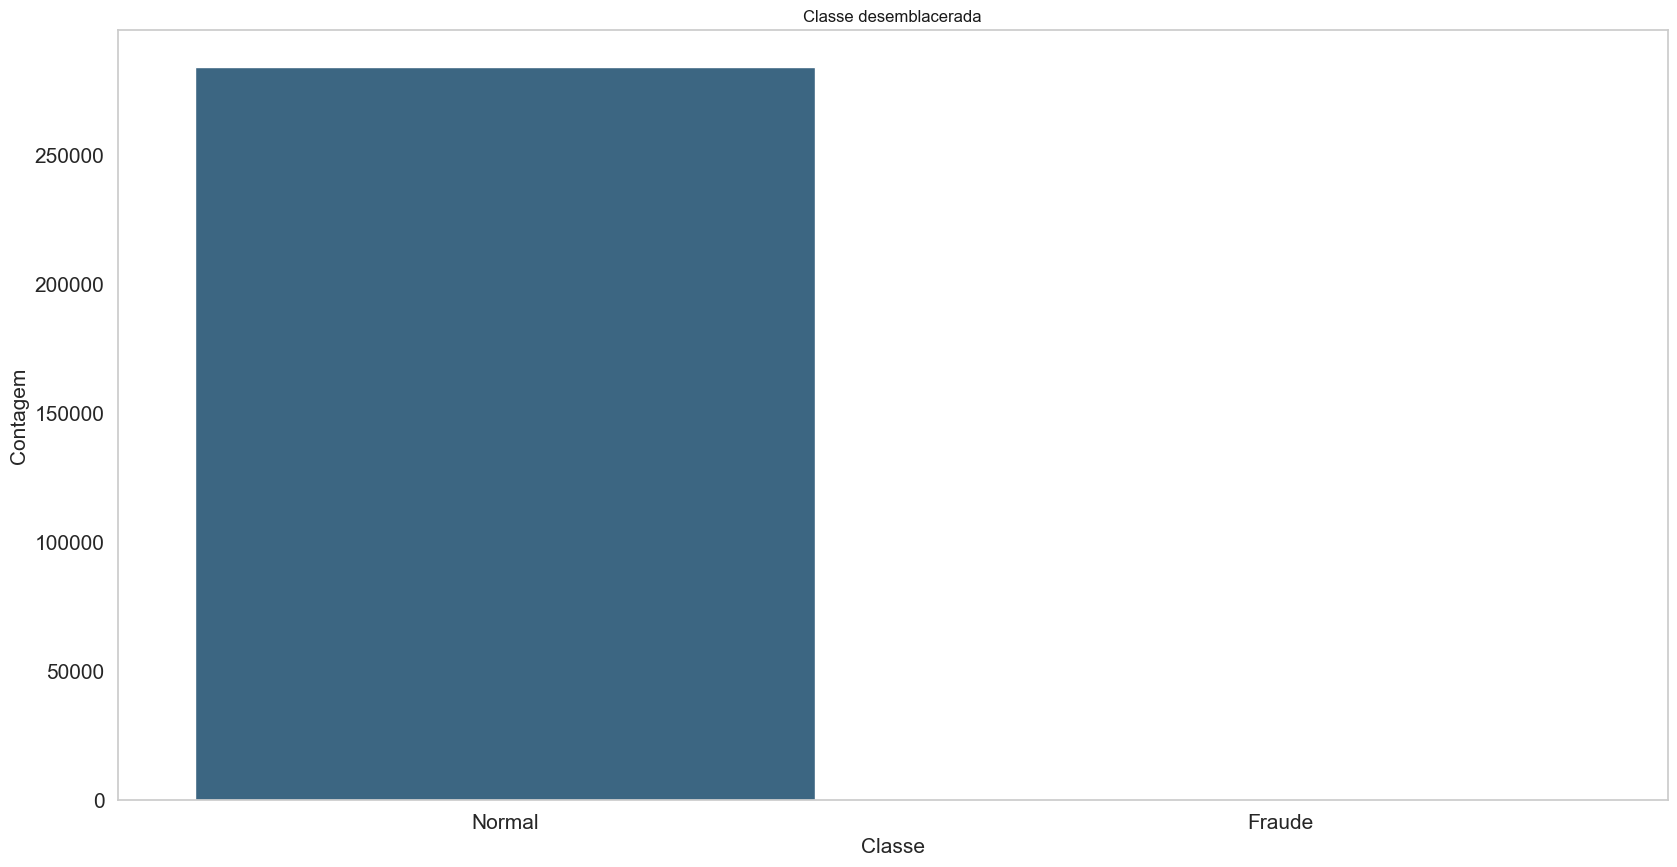

In [12]:
# Função para converter a variável binária classe para string
def ana_fraud(data):
    if (data == 0):
        return "Normal"
    else:
        return "Fraude"

# Copy dados
data_temp = data.copy()
data_temp["Class"] = data_temp["Class"].apply(ana_fraud)

# Gráfico barra
sns.countplot(data_temp, x="Class", palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title("Classe desemblacerada")
plt.grid(False)
del data_temp

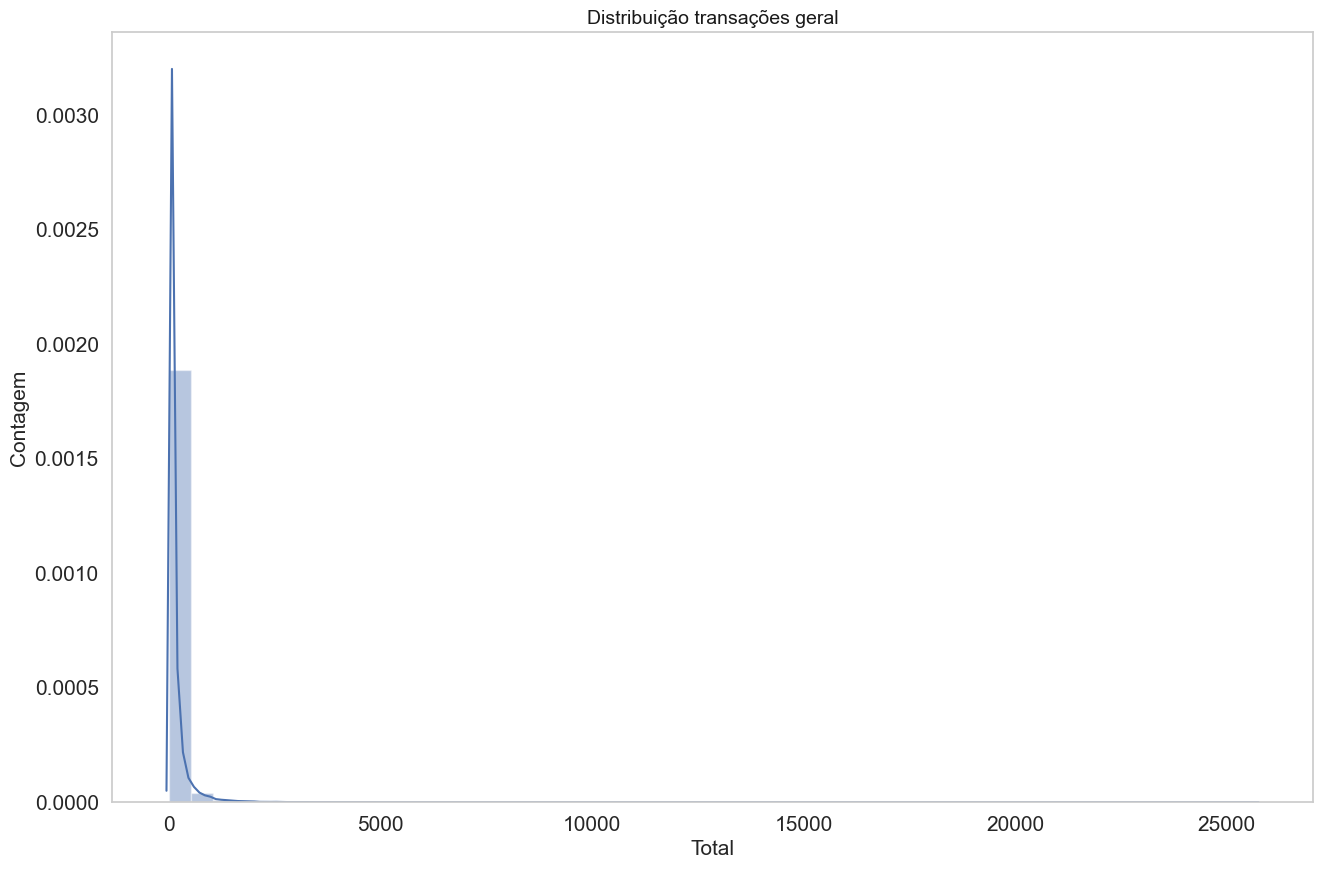

In [13]:
# Grafico transações geral operações cartão credito
plt.figure(figsize=(15.5,10))
sns.distplot(data.Amount)
plt.title("Distribuição transações geral", fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

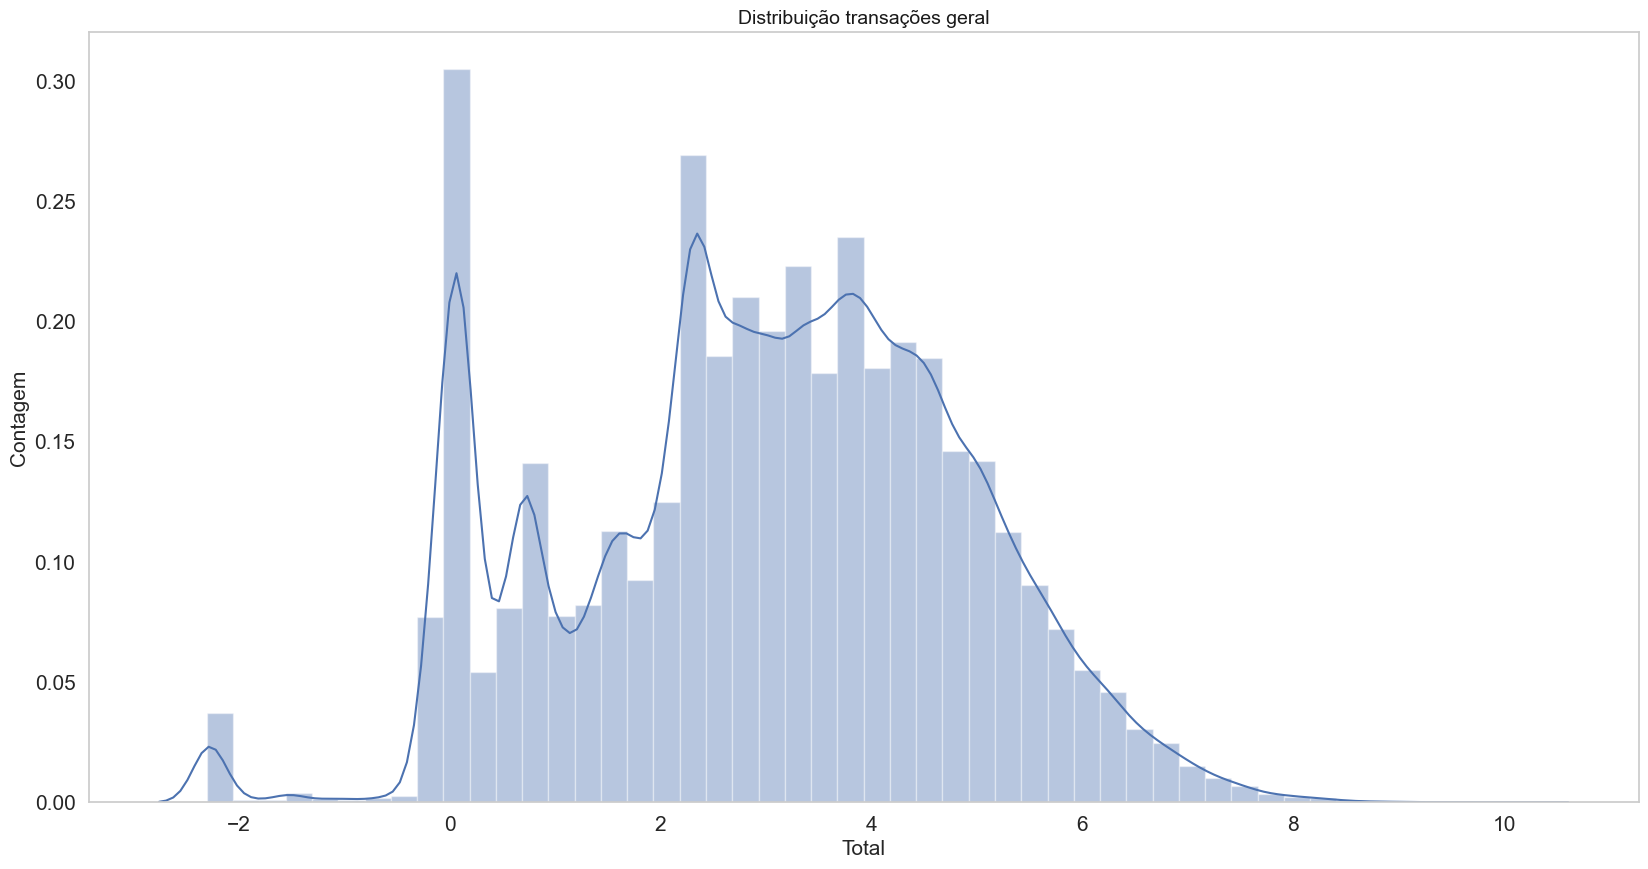

In [14]:
# Gráfico Distribuição transações cartão credito calculo logaritmo
sns.distplot(np.log(data.Amount + 0.1))
plt.title("Distribuição transações geral", fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

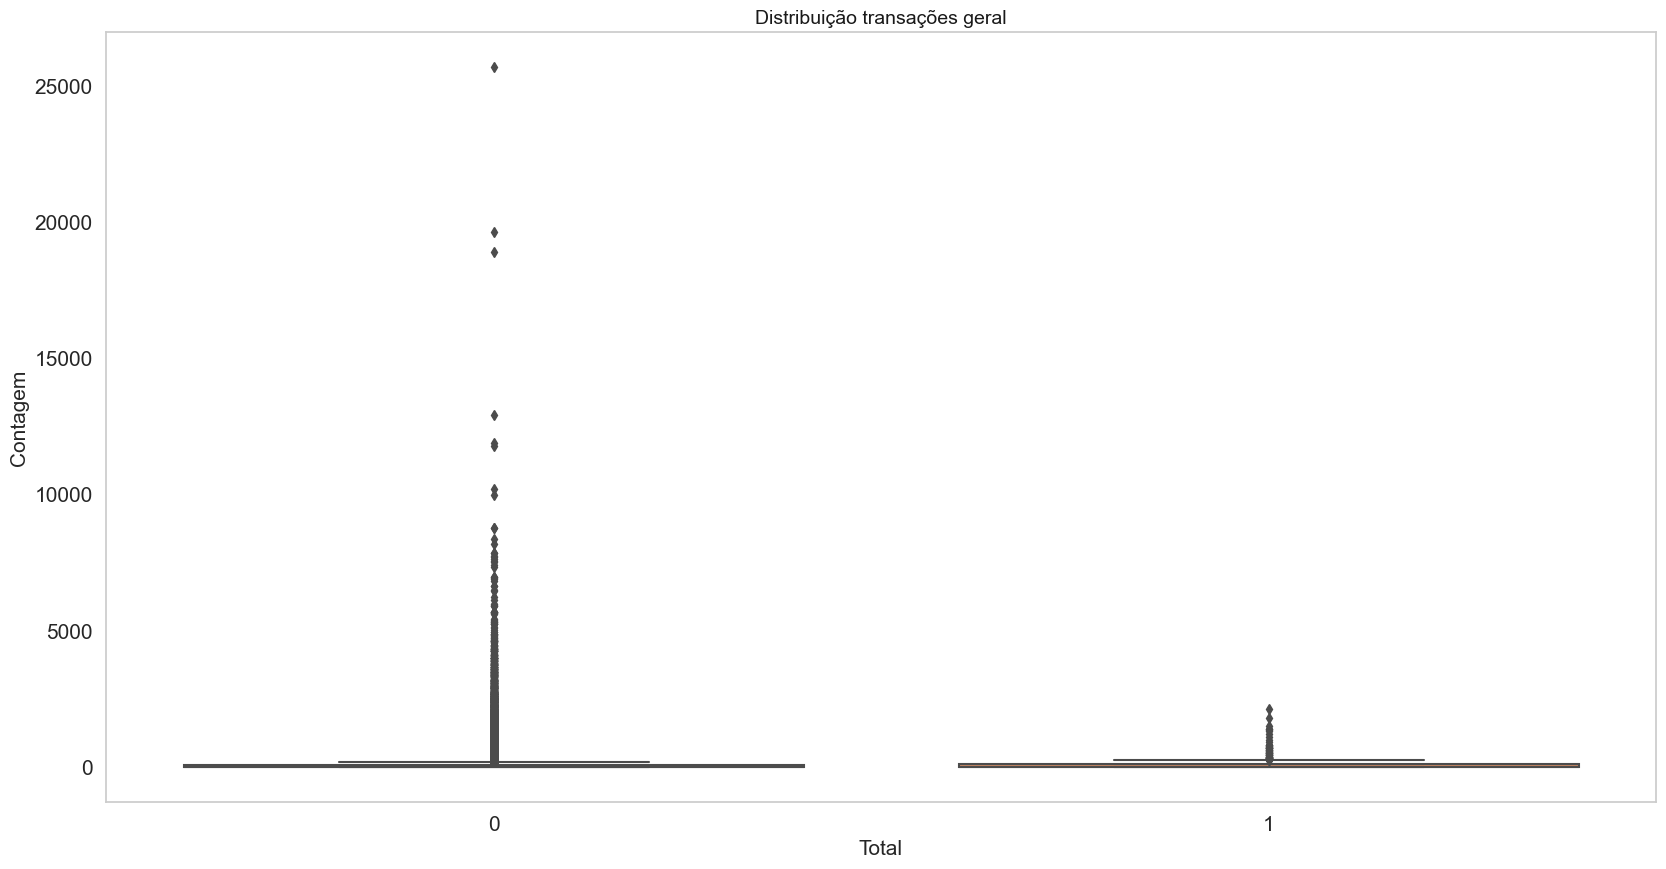

In [15]:
# Grafico de boxplot indentificar outlers
sns.boxplot(x ="Class",y="Amount", data=data)
plt.title("Distribuição transações geral",fontsize=14)
plt.xlabel('Total')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

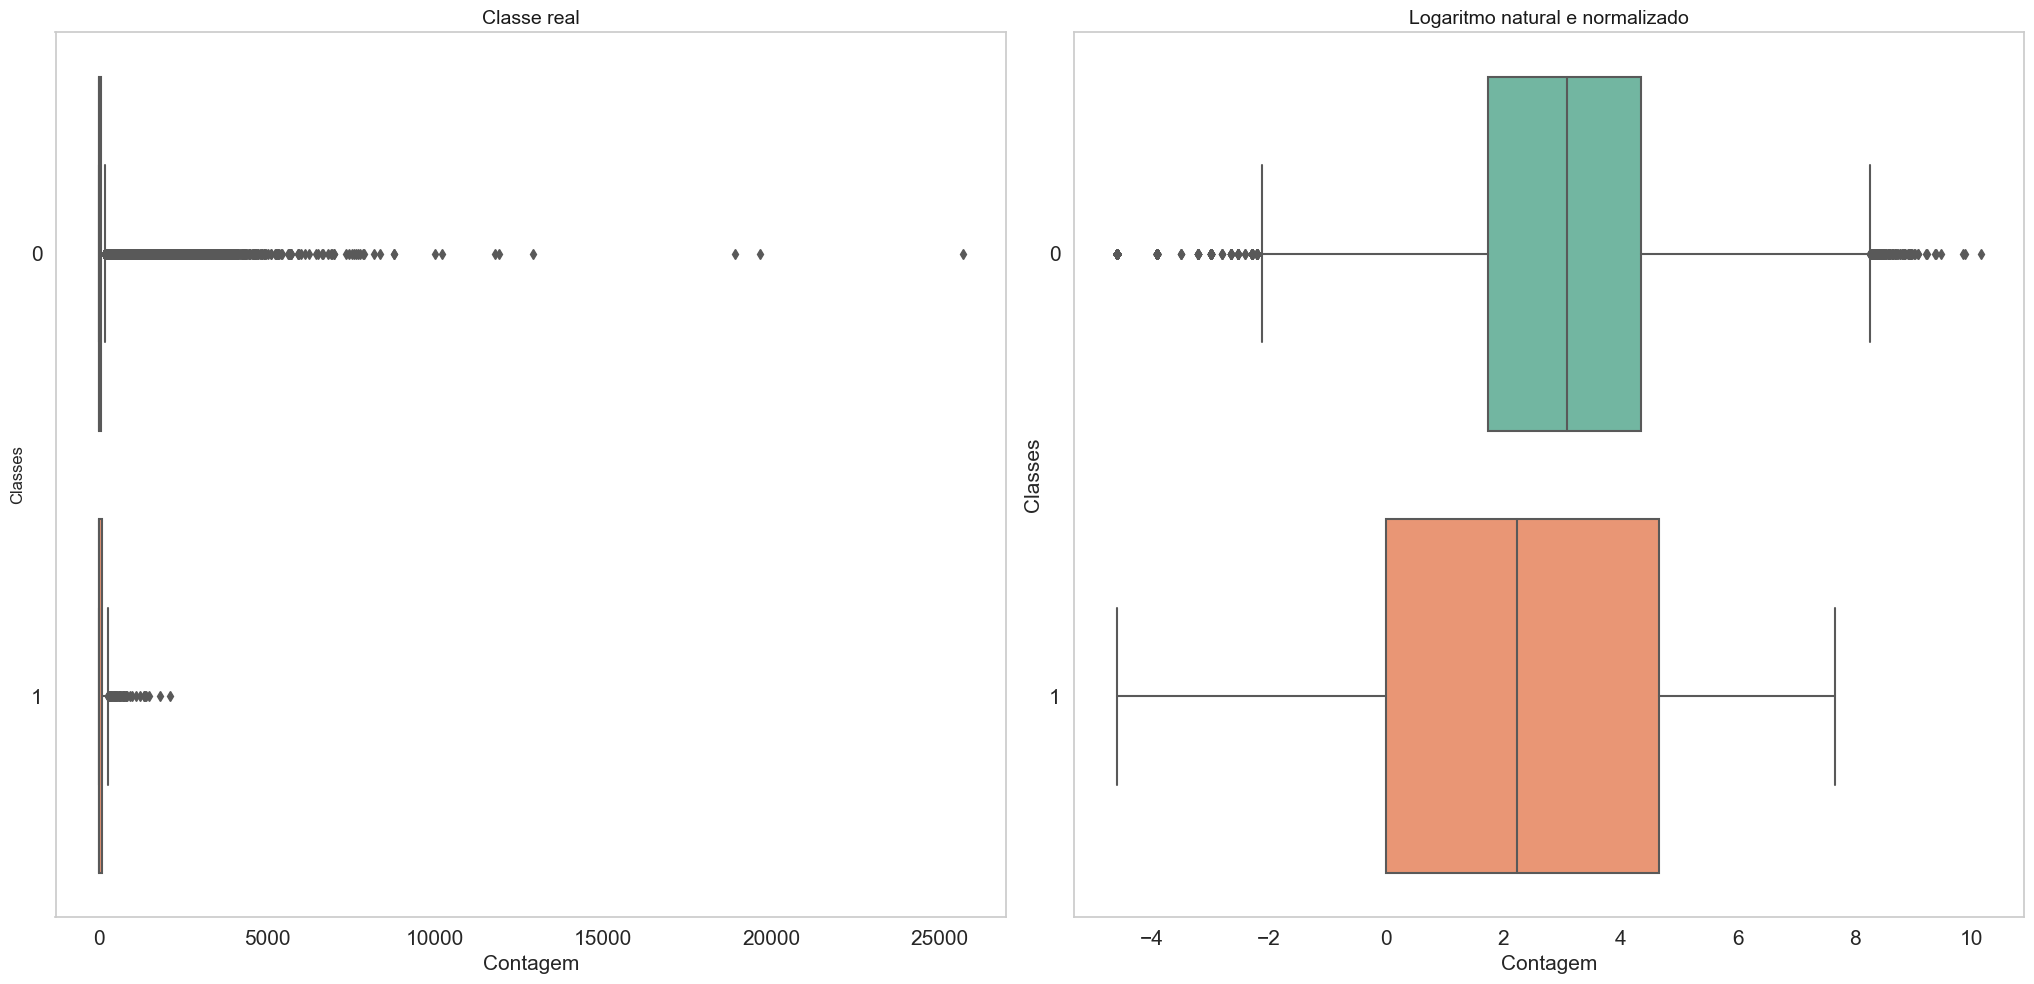

In [16]:
# Grafico com cálcula o logaritmo natural de cada valor presente na coluna Amount.

plt.figure(figsize=(20.5, 10))

plt.subplot(121)
ax = sns.boxplot(y="Class", x="Amount", data=data, orient="h", palette="Set2")
ax.set_title("Classe real", fontsize=14)
ax.set_xlabel("Contagem")
ax.set_ylabel("Classes", fontsize=12)
plt.grid(False)

plt.subplot(122)
ax1 = sns.boxplot(y="Class", x=np.log(data.Amount), data=data, orient="h", palette="Set2")
ax1.set_title("Logaritmo natural e normalizado", fontsize=14)
ax1.set_xlabel("Contagem")
ax1.set_ylabel("Classes")
plt.grid(False)

plt.tight_layout()
plt.show()

Ao examinar a distribuição dos valores e dos horários das transações, pudemos analisar distintamente os padrões entre transações normais e aquelas classificadas como fraudulentas. Essa análise detalhada revela nuances importantes na natureza das transações em ambos os cenários, permitindo uma compreensão mais aprofundada sobre como os valores e os horários variam entre transações legítimas e fraudulentas, fornecendo assim insights cruciais para o processo de detecção de anomalias.

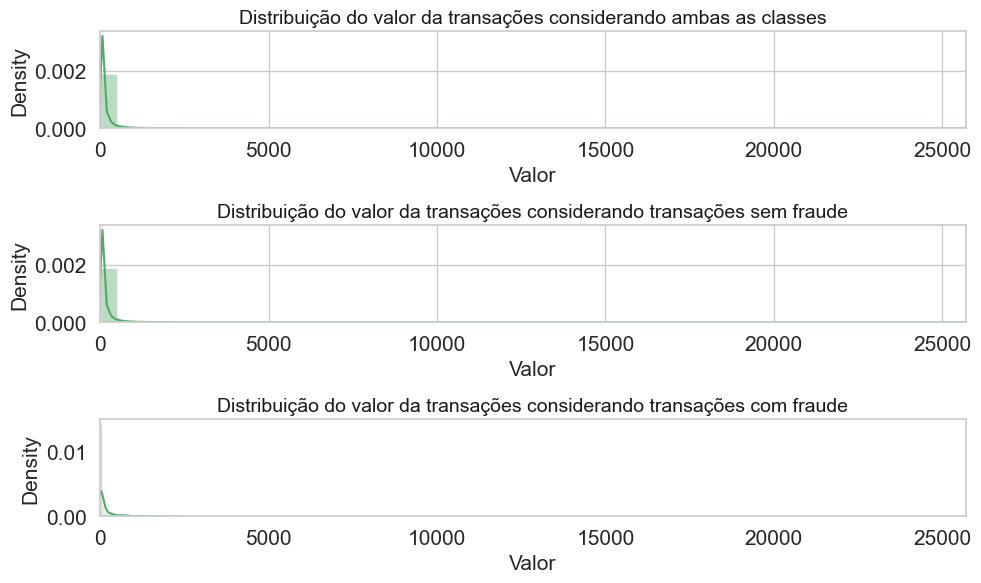

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
sns.distplot(data['Amount'], ax=ax[0], color='g')
ax[0].set_title('Distribuição do valor da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[0].set_xlabel('Valor')

sns.distplot(data[data['Class']==0]['Amount'], ax=ax[1], color='g')
ax[1].set_title('Distribuição do valor da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[1].set_xlabel('Valor')

sns.distplot(data[data['Class']==1]['Amount'], ax=ax[2], color='g')
ax[2].set_title('Distribuição do valor da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(data['Amount']), max(data['Amount'])])
ax[2].set_xlabel('Valor')
plt.grid(False)

plt.tight_layout()

Durante a análise, notamos que a maioria das transações apresenta valores consideravelmente baixos, enquanto aquelas identificadas como fraudulentas geralmente se concentram em valores inferiores a 4000 unidades monetárias. Esse padrão sugere que a maioria das transações legítimas tende a ser de montantes menores, enquanto as transações fraudulentas mantêm uma tendência de valores mais baixos em relação ao restante do conjunto de dados.

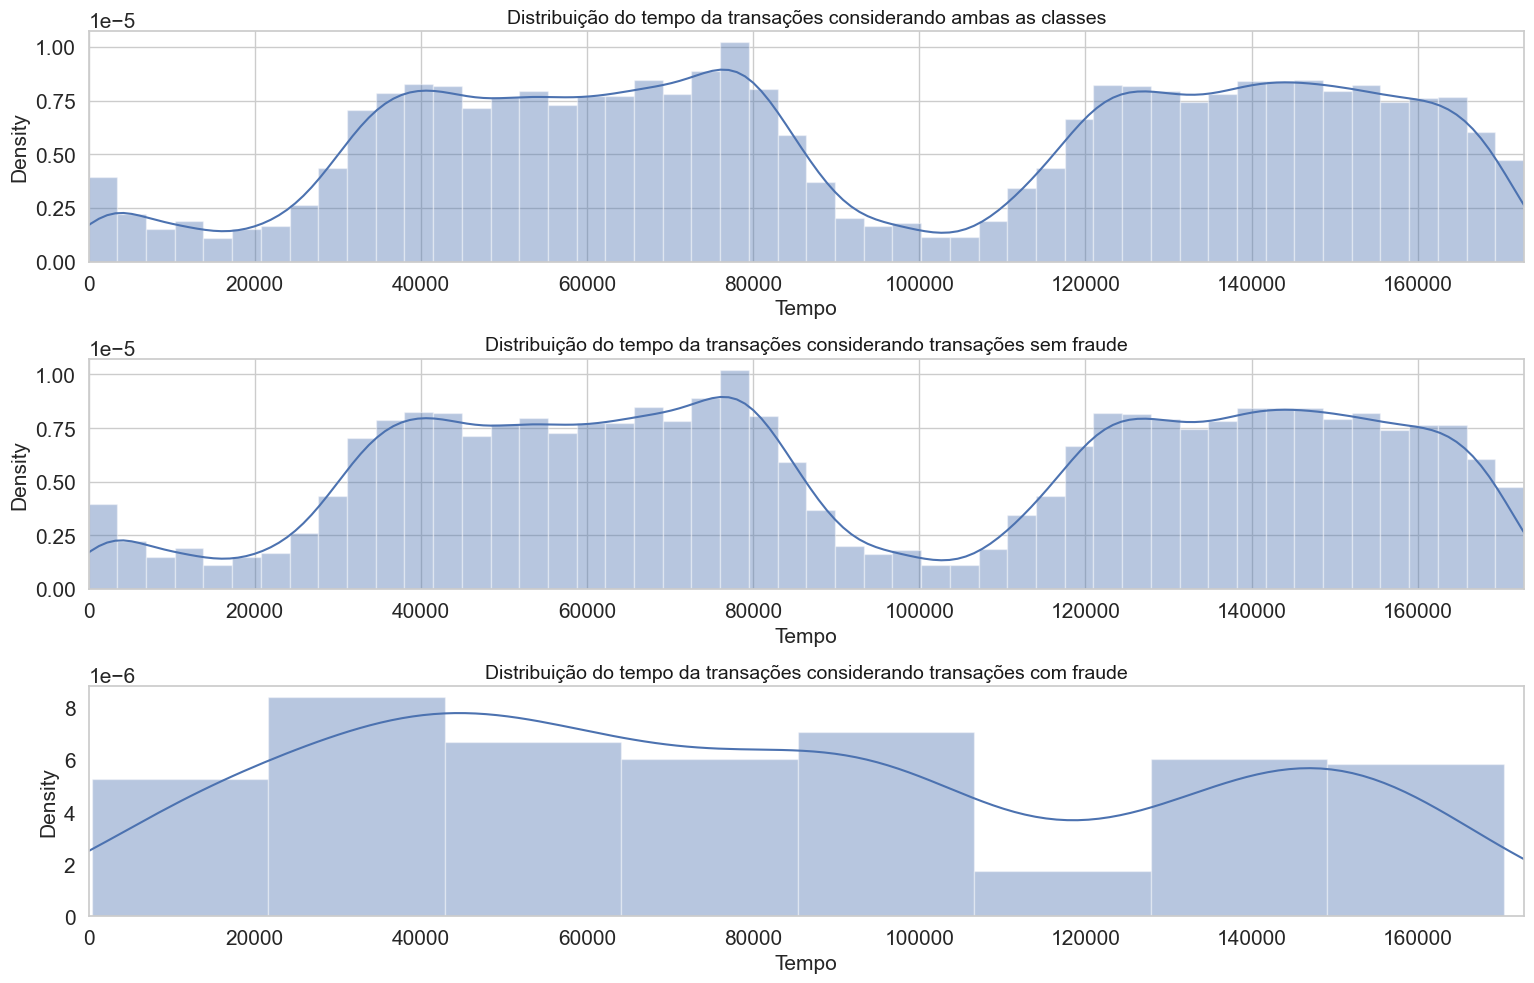

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(15.5, 10))
sns.distplot(data['Time'], ax=ax[0])
plt.grid(False)
ax[0].set_title('Distribuição do tempo da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(data['Time']), max(data['Time'])])
ax[0].set_xlabel('Tempo')

sns.distplot(data[data['Class']==0]['Time'], ax=ax[1])
ax[1].set_title('Distribuição do tempo da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(data['Time']), max(data['Time'])])
ax[1].set_xlabel('Tempo')

sns.distplot(data[data['Class']==1]['Time'], ax=ax[2])
ax[2].set_title('Distribuição do tempo da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(data['Time']), max(data['Time'])])
ax[2].set_xlabel('Tempo')

plt.tight_layout()

Observamos que as transações regulares exibem uma distribuição assimétrica com dois picos distintos, apresentando médias aproximadas de 5000 e 140000 unidades monetárias. Por outro lado, as transações fraudulentas demonstram uma distribuição mais uniforme em relação ao tempo, destacando-se por essa característica em contraste com o comportamento dos valores das transações não fraudulentas.

In [19]:
# Amostra dados
data = data.sample(frac=1)
data_tamanho_fraude = len(data[data['Class']==1])

In [20]:
# Amostra de fraude
data_fraude = data.loc[data['Class'] == 1]
data_sem_fraude = data.loc[data['Class'] == 0][:data_tamanho_fraude]

# Concat novos dados
data_novos = pd.concat([data_fraude, data_sem_fraude])
data_novos = data_novos.sample(frac=1, random_state=42)

# Visualizando
data_novos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105814,69703.0,1.295446,0.280505,0.316943,0.498288,-0.183689,-0.693409,0.092851,-0.208349,-0.012999,-0.082947,-0.557561,0.528601,1.010967,0.088346,1.001519,0.419538,-0.638863,-0.454457,0.064650,-0.037749,-0.283081,-0.786404,0.067429,-0.103255,0.304459,0.123430,-0.025766,0.015307,1.98,0
80760,58642.0,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,3.762306,-4.226225,-2.046694,-4.710498,0.217572,-4.739084,-6.131887,-2.425871,2.314165,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1
213497,139280.0,2.048668,-1.008023,-1.364281,-0.971461,-0.595656,-0.879628,-0.360160,-0.187875,-0.596355,0.968474,0.668567,-0.364059,-0.819083,0.378132,-0.497560,1.222345,-0.064892,-1.112932,1.141092,0.066777,0.005730,-0.255843,0.192042,-0.375454,-0.256981,-0.431075,-0.058016,-0.058987,86.35,0
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,-3.508925,1.439322,-1.959927,0.767485,-4.978118,1.058566,-0.997477,-0.817261,0.307798,0.028485,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1
144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,-5.822449,3.369186,-5.691926,0.287371,-5.413787,-0.555550,-5.863662,-11.143241,-3.480940,2.794333,-0.178534,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64329,51112.0,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,-6.065782,2.707856,-6.136034,-0.545976,-7.028980,0.916069,-4.092884,-7.014622,-2.530967,0.554027,0.832398,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1
245556,152802.0,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,1.045007,-1.474974,0.011037,0.483019,0.665273,-2.332793,0.820578,0.461206,1.468052,0.891706,-0.457934,0.585435,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,357.95,1
281335,170104.0,2.215062,-0.653117,-1.304093,-0.878218,-0.553042,-1.346173,-0.281634,-0.438547,-0.609764,0.856849,-0.487761,-0.333226,0.697422,-0.064491,0.317869,0.798180,0.176847,-1.454434,0.347347,-0.006506,0.445141,1.338308,-0.013502,0.062208,0.205574,0.069923,-0.032744,-0.064870,15.00,0
243848,152098.0,-4.124316,3.748597,-7.926507,7.763242,-0.769375,-2.031171,-3.474549,0.107121,-1.551352,-2.411272,4.480035,-8.832510,-1.215164,-13.725685,1.232744,-4.389688,-5.810920,-1.255422,1.114033,-0.181979,0.547097,0.687854,0.429939,-0.620601,-0.369688,0.367349,-2.664767,0.417101,1.00,1


In [21]:
# Salvando dataset
data_novos.to_csv("dataset_limpo_2.csv")

## Correlação dados

In [22]:
# Visualizando correlação
desbalanceada_correlacao = data.corr()
balanceada_correlacao = data_novos.corr()

In [23]:
# Visualizando correlação
desbalanceada_correlacao = data.corr()
balanceada_correlacao = data_novos.corr()

Text(0.5, 1.0, 'Matriz de correlação dados balanceados')

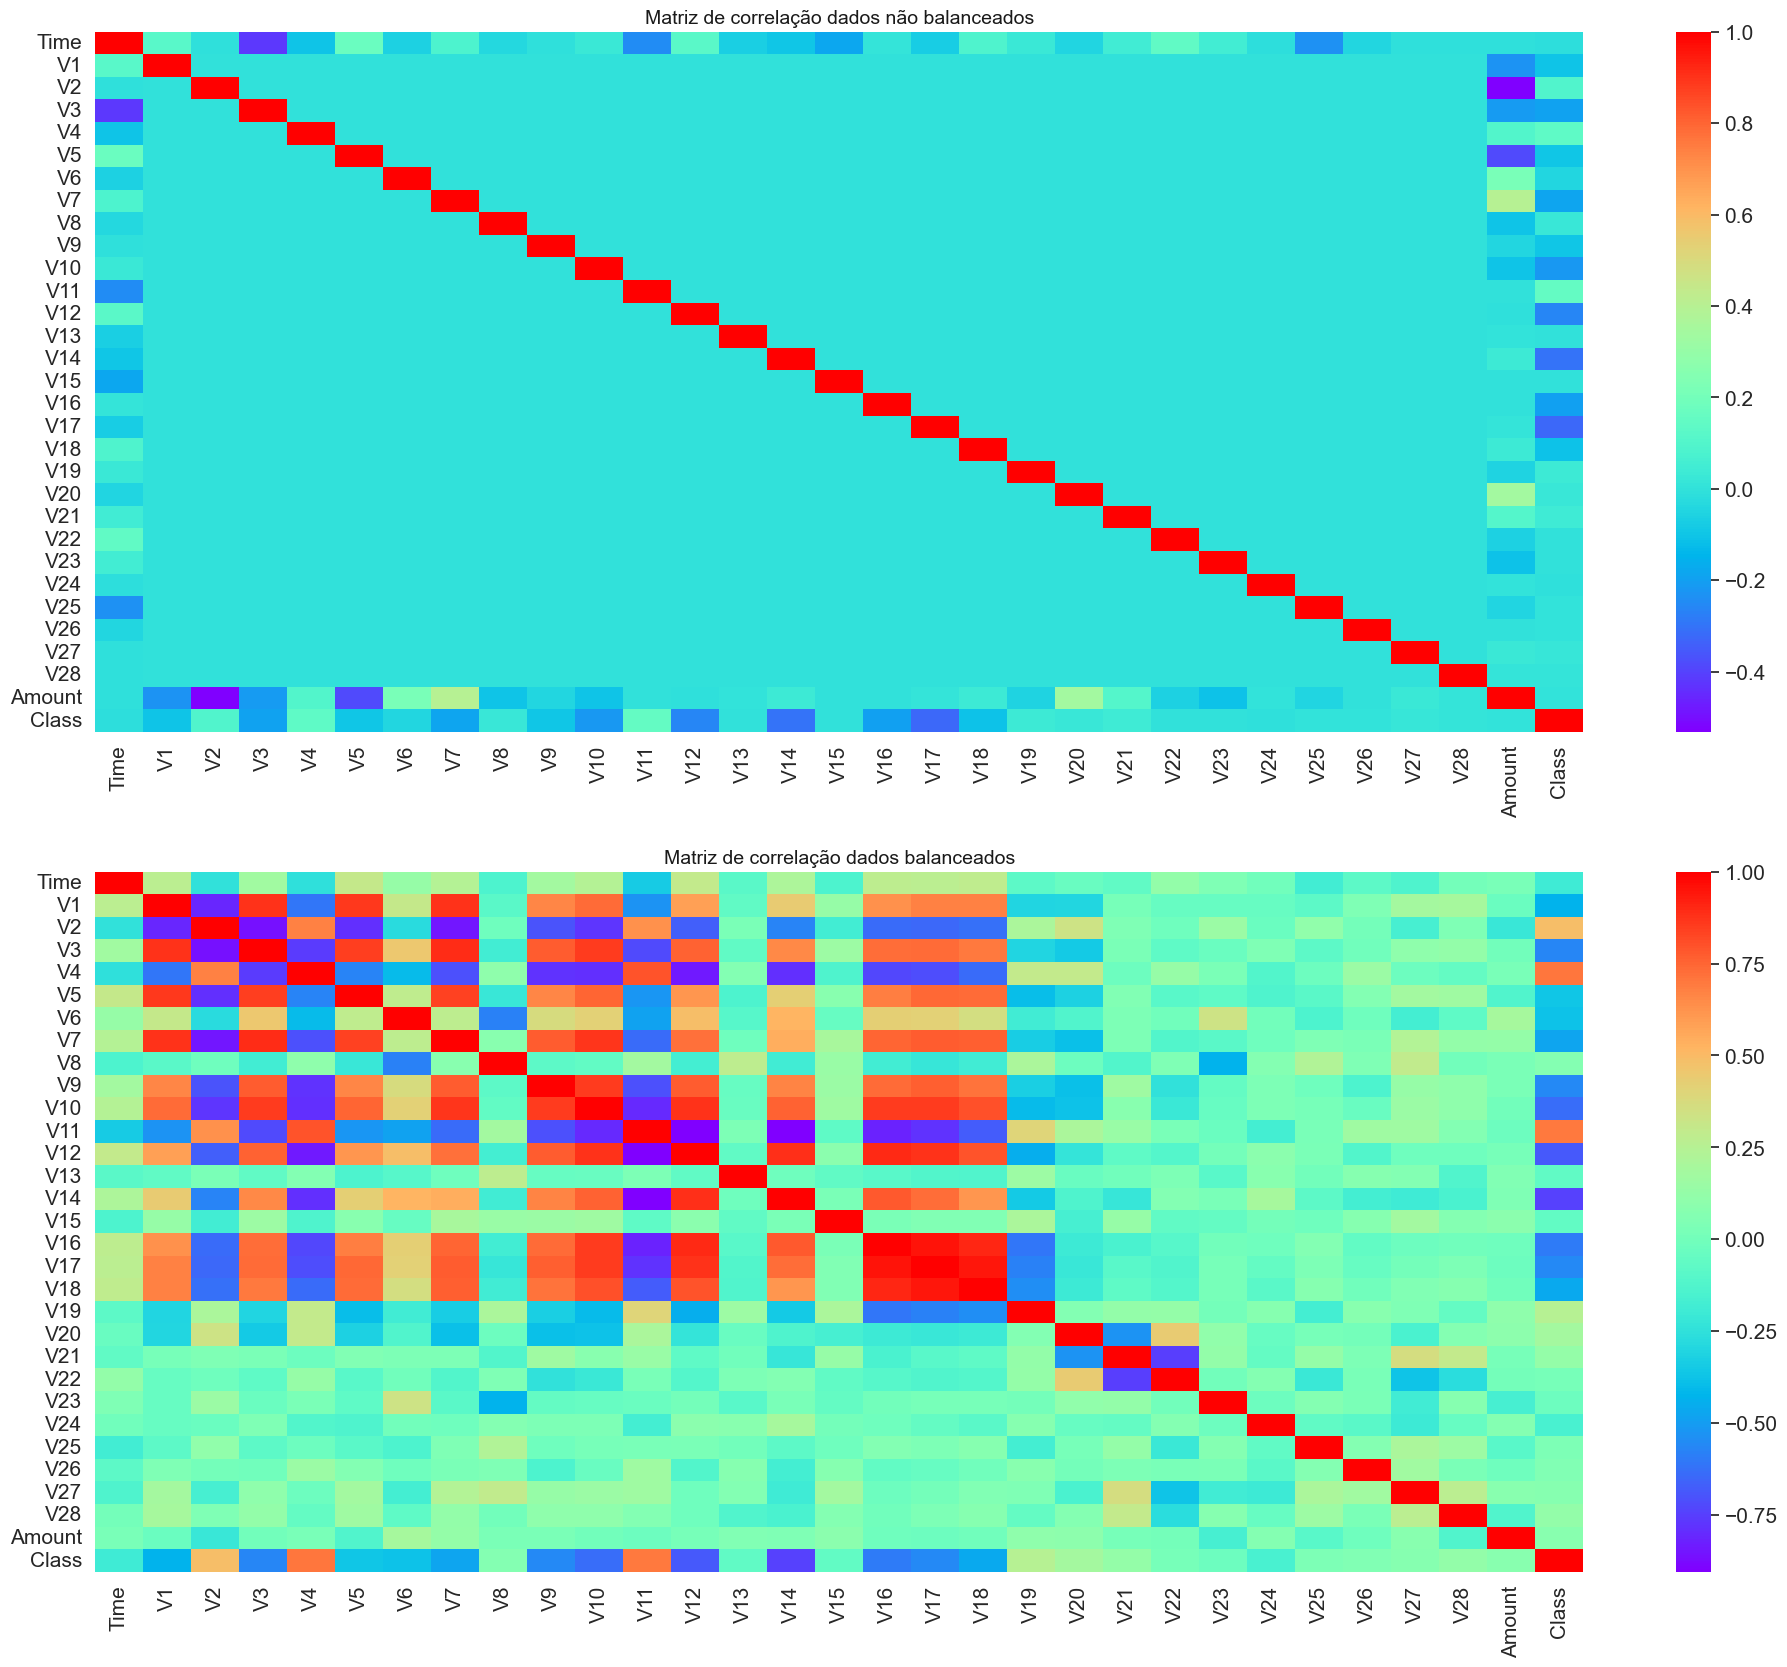

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(desbalanceada_correlacao, cmap='rainbow', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matriz de correlação dados não balanceados", fontsize=14)

sns.heatmap(balanceada_correlacao, cmap='rainbow', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matriz de correlação dados balanceados', fontsize=14)

Podemos notar que, no caso da amostra não balanceada, parece não haver correlação visível entre as variáveis. No entanto, após a aplicação da amostra balanceada, torna-se evidente a presença de correlação entre elas.

Observamos que as variáveis V3, V10, V12 e V14 exibem uma correlação negativa, onde valores mais negativos indicam uma maior probabilidade de a transação ser classificada como fraude.

Por outro lado, as variáveis V2, V4 e V11 apresentam uma correlação positiva, indicando que valores mais altos nessas variáveis sugerem uma maior probabilidade de fraude estar presente nas transações. Essas relações são cruciais para identificar padrões nos dados e podem ser usadas como indicadores significativos na detecção de fraudes.

<AxesSubplot: xlabel='Class', ylabel='V11'>

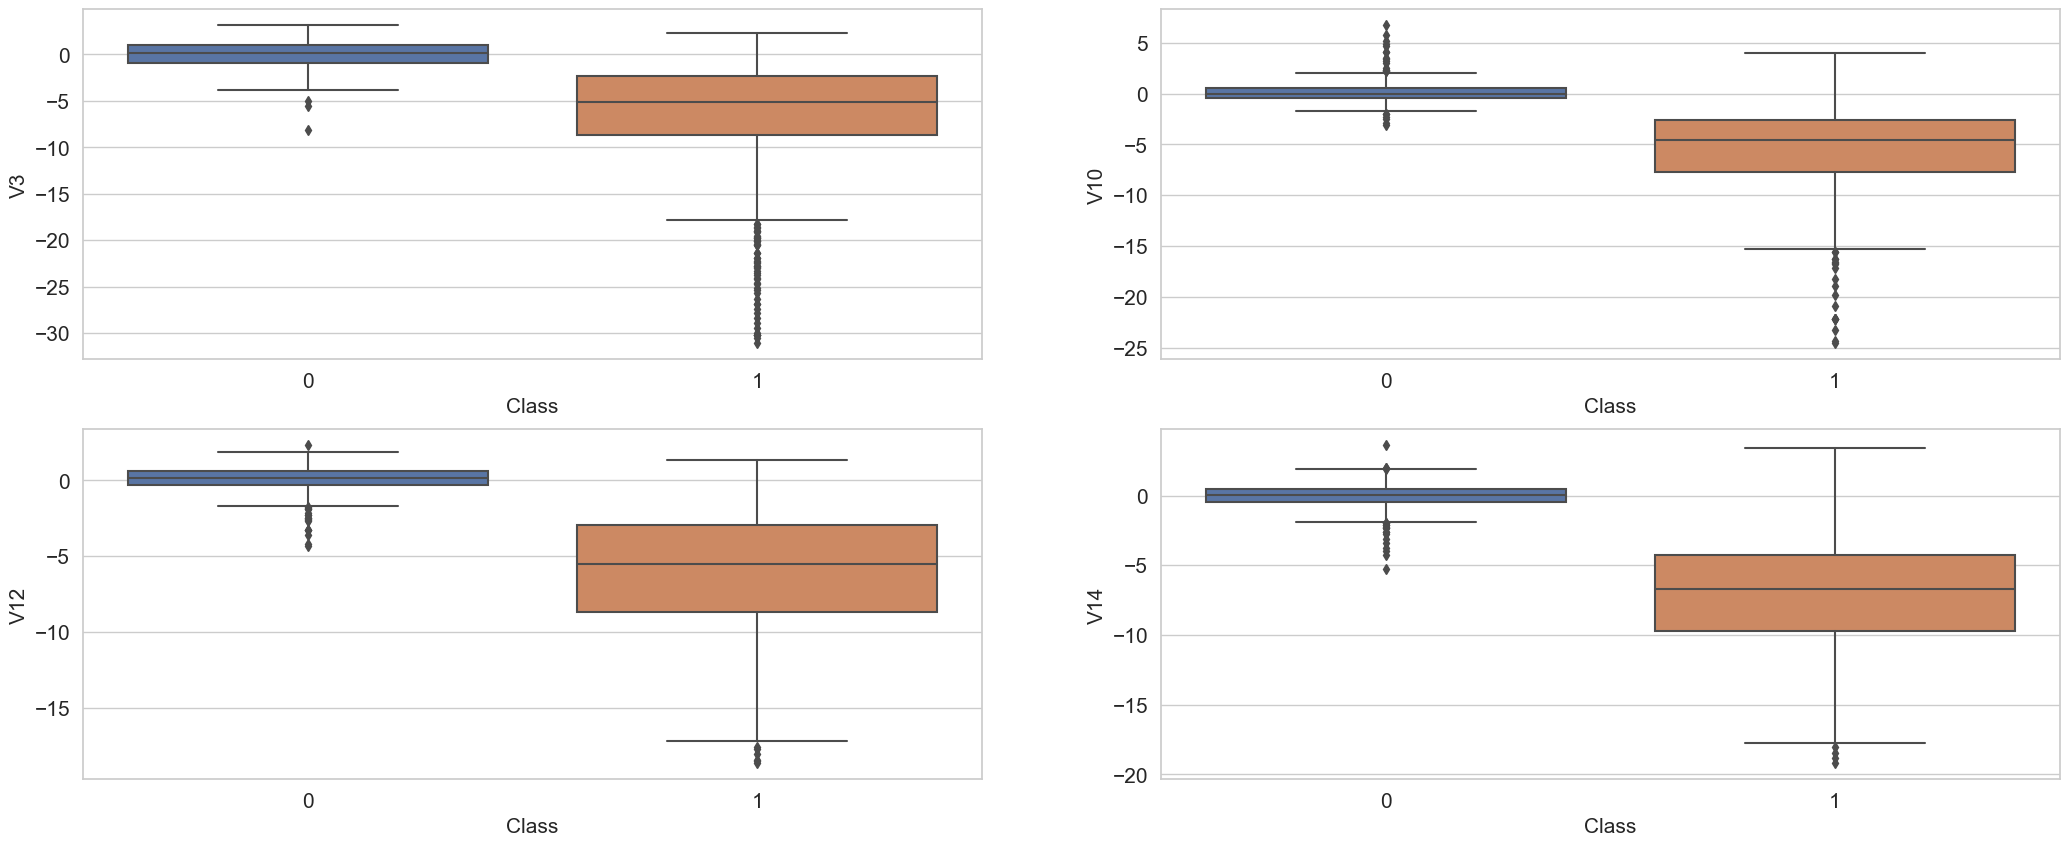

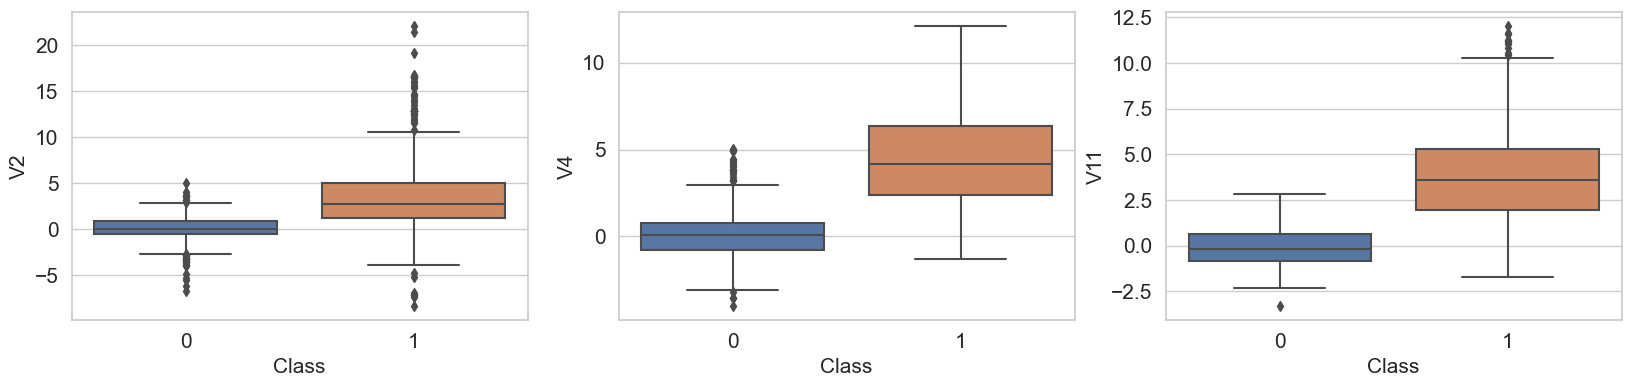

In [25]:
# boxplot irão nos ajudara
f, ax = plt.subplots(2,2, figsize=(25.5, 10))

sns.boxplot(x="Class", y="V3", data=data_novos,ax=ax[0][0])
sns.boxplot(x="Class", y="V10", data=data_novos,ax=ax[0][1])
sns.boxplot(x="Class", y="V12", data=data_novos,ax=ax[1][0])
sns.boxplot(x="Class", y="V14", data=data_novos,ax=ax[1][1])

f, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=data_novos,ax=ax[0])
sns.boxplot(x="Class", y="V4", data=data_novos,ax=ax[1])
sns.boxplot(x="Class", y="V11", data=data_novos,ax=ax[2])

Durante a análise dos boxplots de todas as variáveis, identificamos a presença significativa de muitos outliers, o que pode ter um impacto prejudicial no desempenho dos modelos de classificação. Para lidar com esse cenário, realizaremos uma análise detalhada de cada boxplot, dedicando atenção especial à identificação e remoção desses outliers.

O processo de remoção dos outliers é crucial para garantir a robustez e a precisão dos modelos de classificação. Ao investigar minuciosamente cada variável e proceder com a remoção cuidadosa dos outliers identificados, buscaremos aprimorar a qualidade dos dados, preparando um conjunto mais confiável para a construção dos modelos de machine learning.

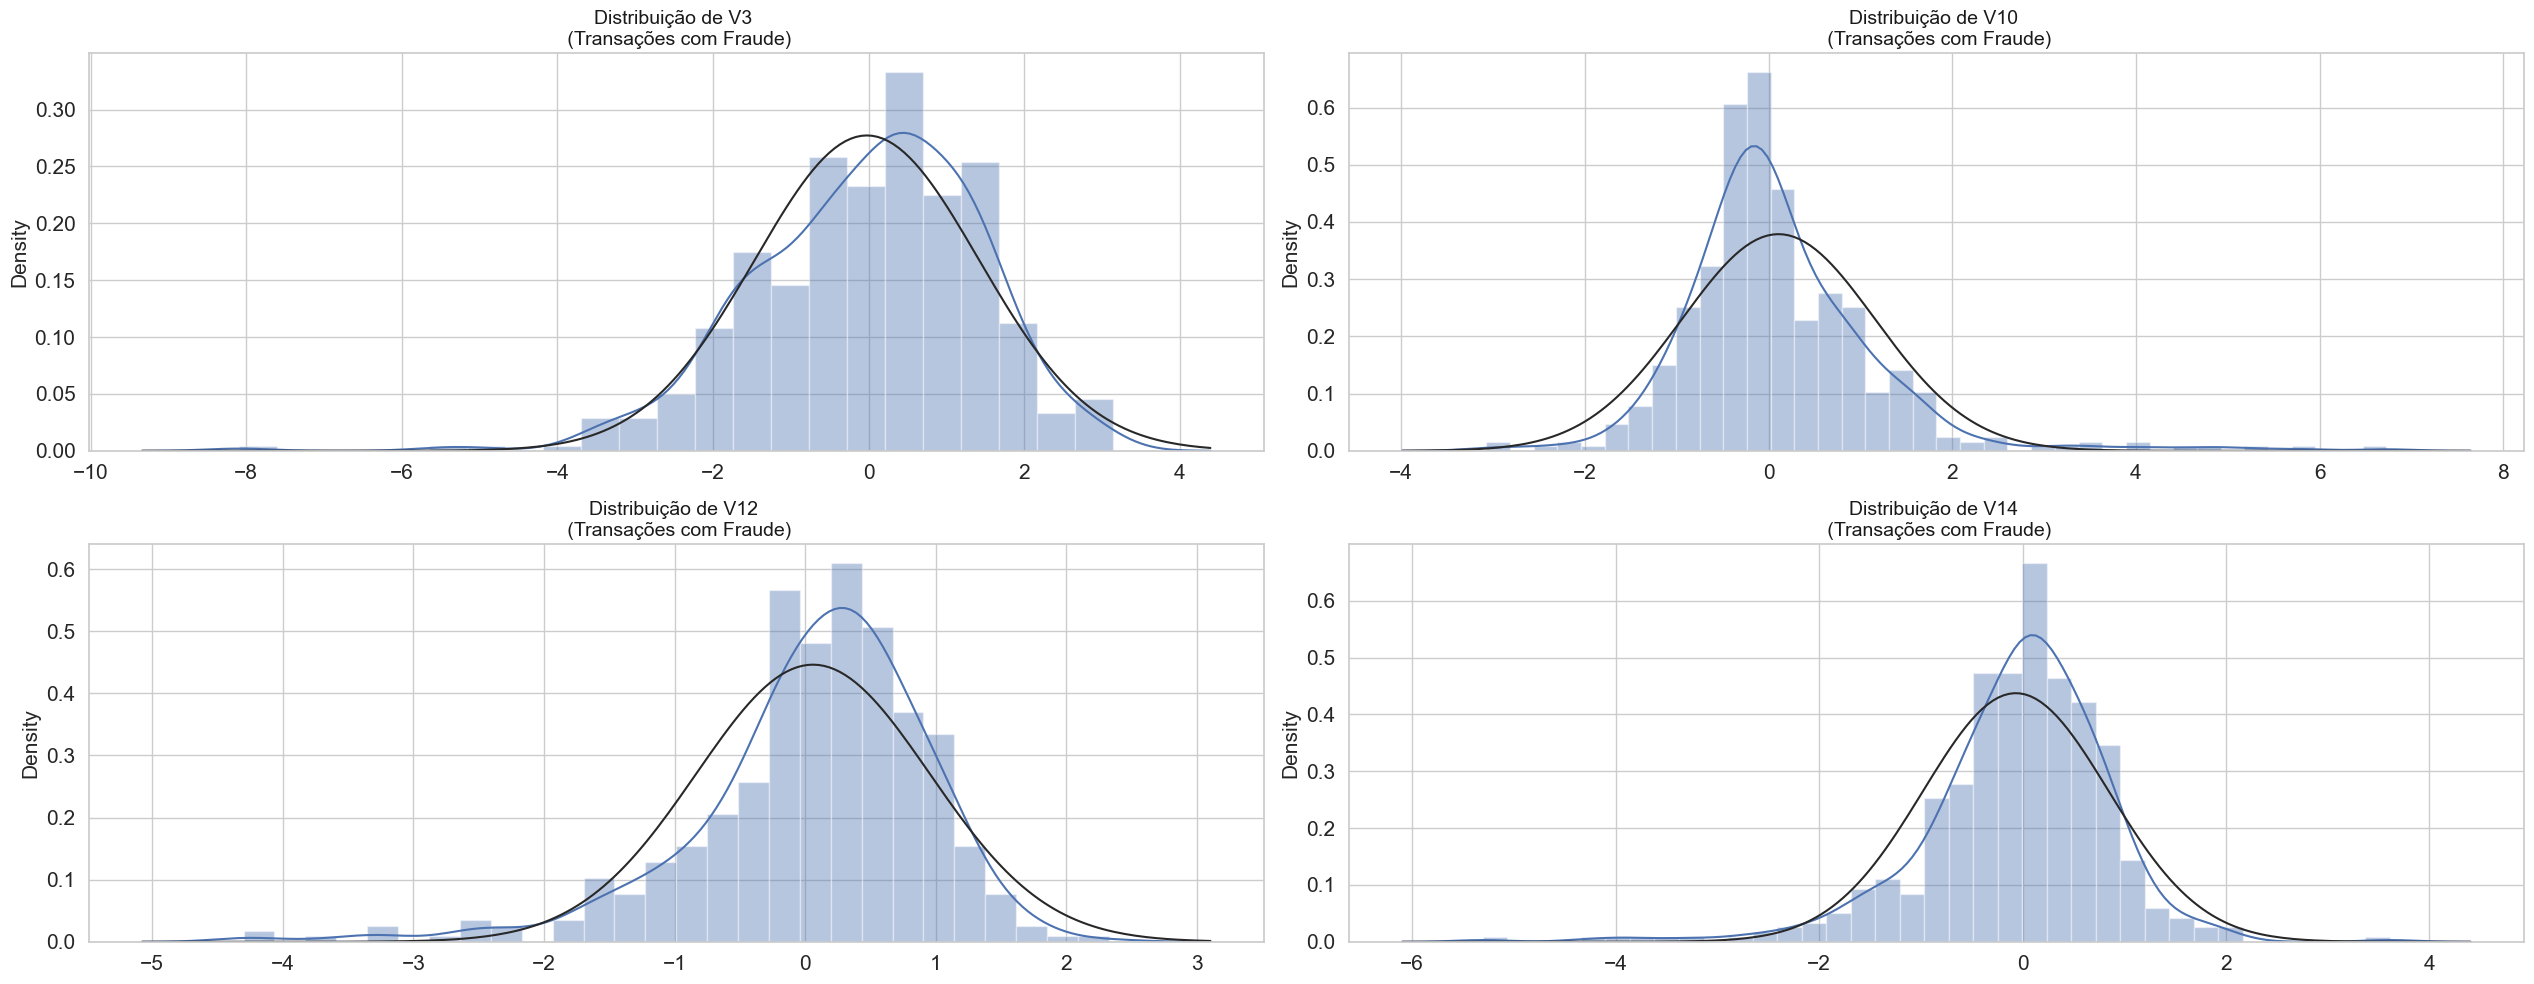

In [26]:
# Importando biblioteca
from scipy.stats import norm

f, ax = plt.subplots(2,2, figsize=(25.5, 10))

distribuicao_v3 = data_novos['V3'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v3,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

distribuicao_v10 = data_novos['V10'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v10,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

distribuicao_v12 = data_novos['V12'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v12,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

distribuicao_v14 = data_novos['V14'].loc[data_novos['Class'] == 0].values
sns.distplot(distribuicao_v14,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

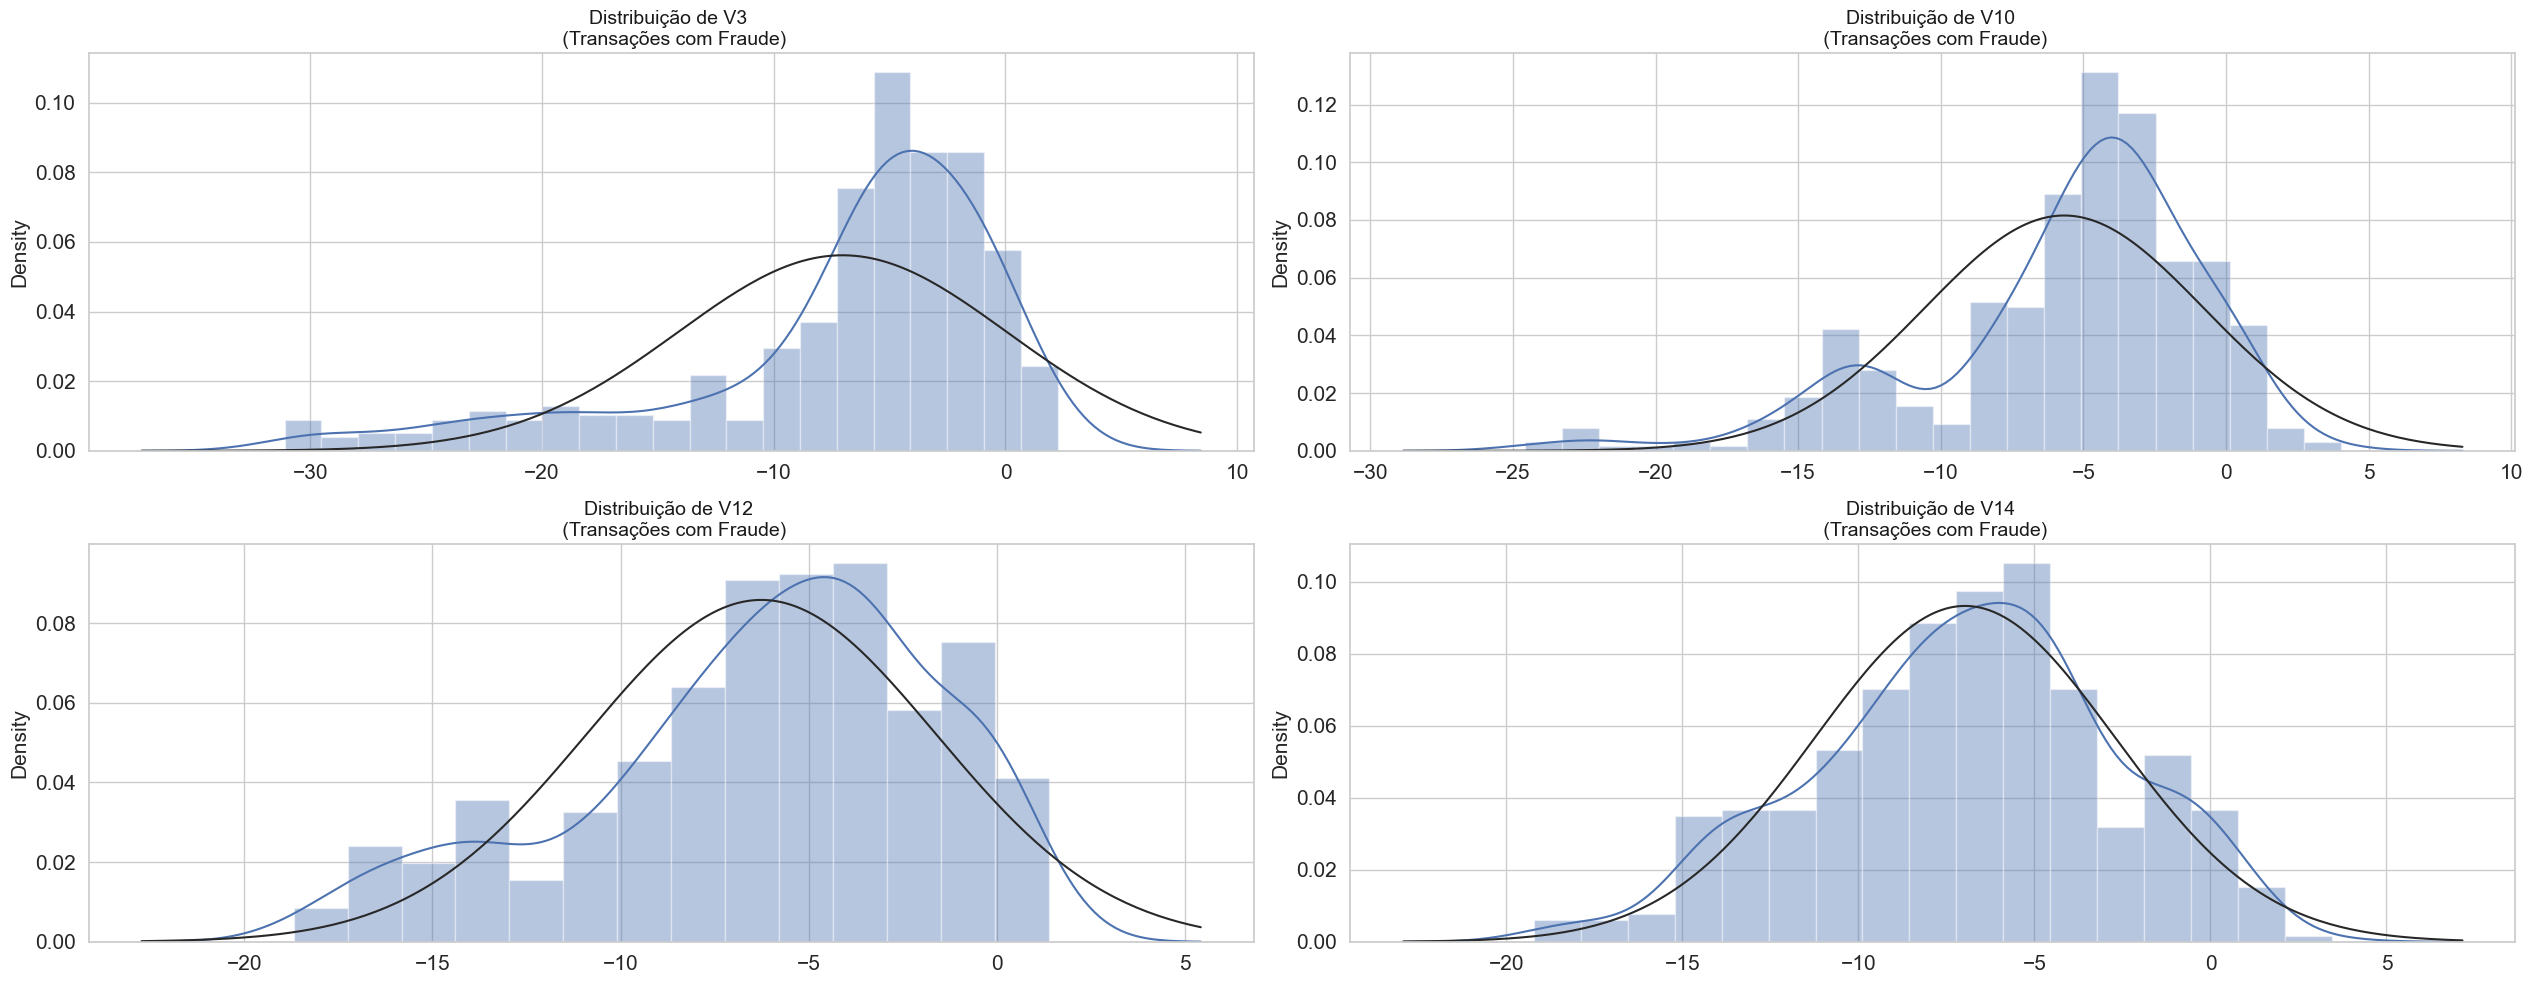

In [27]:
f, ax = plt.subplots(2,2, figsize=(25.5, 10))

v3_distribuicao = data_novos['V3'].loc[data_novos['Class'] == 1].values
sns.distplot(v3_distribuicao,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

v10_distribuicao = data_novos['V10'].loc[data_novos['Class'] == 1].values
sns.distplot(v10_distribuicao,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

v12_distribuicao = data_novos['V12'].loc[data_novos['Class'] == 1].values
sns.distplot(v12_distribuicao,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

v14_distribuicao = data_novos['V14'].loc[data_novos['Class'] == 1].values
sns.distplot(v14_distribuicao,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

Ao comparar as amostras entre transações com fraude e transações sem fraude, pudemos identificar notáveis diferenças na distribuição de certas variáveis. Para o caso de fraude, observamos que a variável V3 exibe uma distribuição distinta, com valores mais negativos em comparação com o caso de transações sem fraude. Similarmente, a variável V10 mostra uma concentração em torno de zero para transações não fraudulentas, enquanto para transações fraudulentas, os valores tendem a ser mais negativos. As variáveis V12 e V14 apresentam comportamentos semelhantes ao padrão observado na variável V10.

Para aprimorar a capacidade do modelo em identificar transações fraudulentas, optaremos por realizar um processo de remoção de outliers nas variáveis que demonstraram maior correlação com o fenômeno de fraude. Essa abordagem visa aumentar a eficiência do modelo na detecção dessas transações suspeitas.

O método a ser empregado para identificar e remover outliers será o cálculo do intervalo interquartil (IQR), determinado pela diferença entre o terceiro e o primeiro quartil dos dados. Qualquer valor que se encontre acima do intervalo estabelecido pelo IQR será considerado um outlier e, consequentemente, removido do conjunto de dados. Esse processo seletivo visa melhorar a qualidade dos dados utilizados para treinar o modelo, refinando a capacidade preditiva em identificar transações fraudulentas.

## Remoção de outliers

In [28]:
v3_fraude = data_novos['V3'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v3_fraude, 25), np.percentile(v3_fraude, 75)

v3_iqr = q75 - q25

v3_cut_off = v3_iqr * 1.5
v3_inferior, v3_superior = q25 - v3_cut_off, q75 + v3_cut_off

outliers = [x for x in v3_fraude if x < v3_inferior or x > v3_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V3'] > v3_superior) | (data_novos['V3'] < v3_inferior)].index)

v10_fraude = data_novos['V10'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)

v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_inferior, v10_superior = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in v10_fraude if x < v10_inferior or x > v10_superior]

dados_novos = data_novos.drop(data_novos[(data_novos['V10'] > v10_superior) | (data_novos['V10'] < v10_inferior)].index)

v12_fraude = data_novos['V12'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)

v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_inferior, v12_superior = q25 - v12_cut_off, q75 + v12_cut_off

outliers = [x for x in v12_fraude if x < v12_inferior or x > v12_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V12'] > v12_superior) | (data_novos['V12'] < v12_inferior)].index)

v14_fraude = data_novos['V14'].loc[data_novos['Class'] == 1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)

v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_inferior, v14_superior = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraude if x < v14_inferior or x > v14_superior]

data_novos = data_novos.drop(data_novos[(data_novos['V14'] > v14_superior) | (data_novos['V14'] < v14_inferior)].index)
data_novos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105814,69703.0,1.295446,0.280505,0.316943,0.498288,-0.183689,-0.693409,0.092851,-0.208349,-0.012999,-0.082947,-0.557561,0.528601,1.010967,0.088346,1.001519,0.419538,-0.638863,-0.454457,0.064650,-0.037749,-0.283081,-0.786404,0.067429,-0.103255,0.304459,0.123430,-0.025766,0.015307,1.98,0
80760,58642.0,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,3.762306,-4.226225,-2.046694,-4.710498,0.217572,-4.739084,-6.131887,-2.425871,2.314165,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1
213497,139280.0,2.048668,-1.008023,-1.364281,-0.971461,-0.595656,-0.879628,-0.360160,-0.187875,-0.596355,0.968474,0.668567,-0.364059,-0.819083,0.378132,-0.497560,1.222345,-0.064892,-1.112932,1.141092,0.066777,0.005730,-0.255843,0.192042,-0.375454,-0.256981,-0.431075,-0.058016,-0.058987,86.35,0
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,-3.508925,1.439322,-1.959927,0.767485,-4.978118,1.058566,-0.997477,-0.817261,0.307798,0.028485,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1
144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,-5.822449,3.369186,-5.691926,0.287371,-5.413787,-0.555550,-5.863662,-11.143241,-3.480940,2.794333,-0.178534,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1


Após o processo de remoção dos outliers, vamos gerar um novo boxplot para verificar se esses valores discrepantes foram efetivamente removidos do conjunto de dados. Essa etapa é crucial para avaliar a eficácia do procedimento de limpeza e garantir que os dados estejam mais alinhados com a distribuição original, proporcionando assim uma representação mais precisa e confiável das variáveis em estudo. O novo boxplot nos permitirá visualizar qualquer mudança significativa na dispersão dos dados, indicando se os outliers foram adequadamente tratados e se o conjunto de dados está mais preparado para a construção e treinamento dos modelos de machine learning.

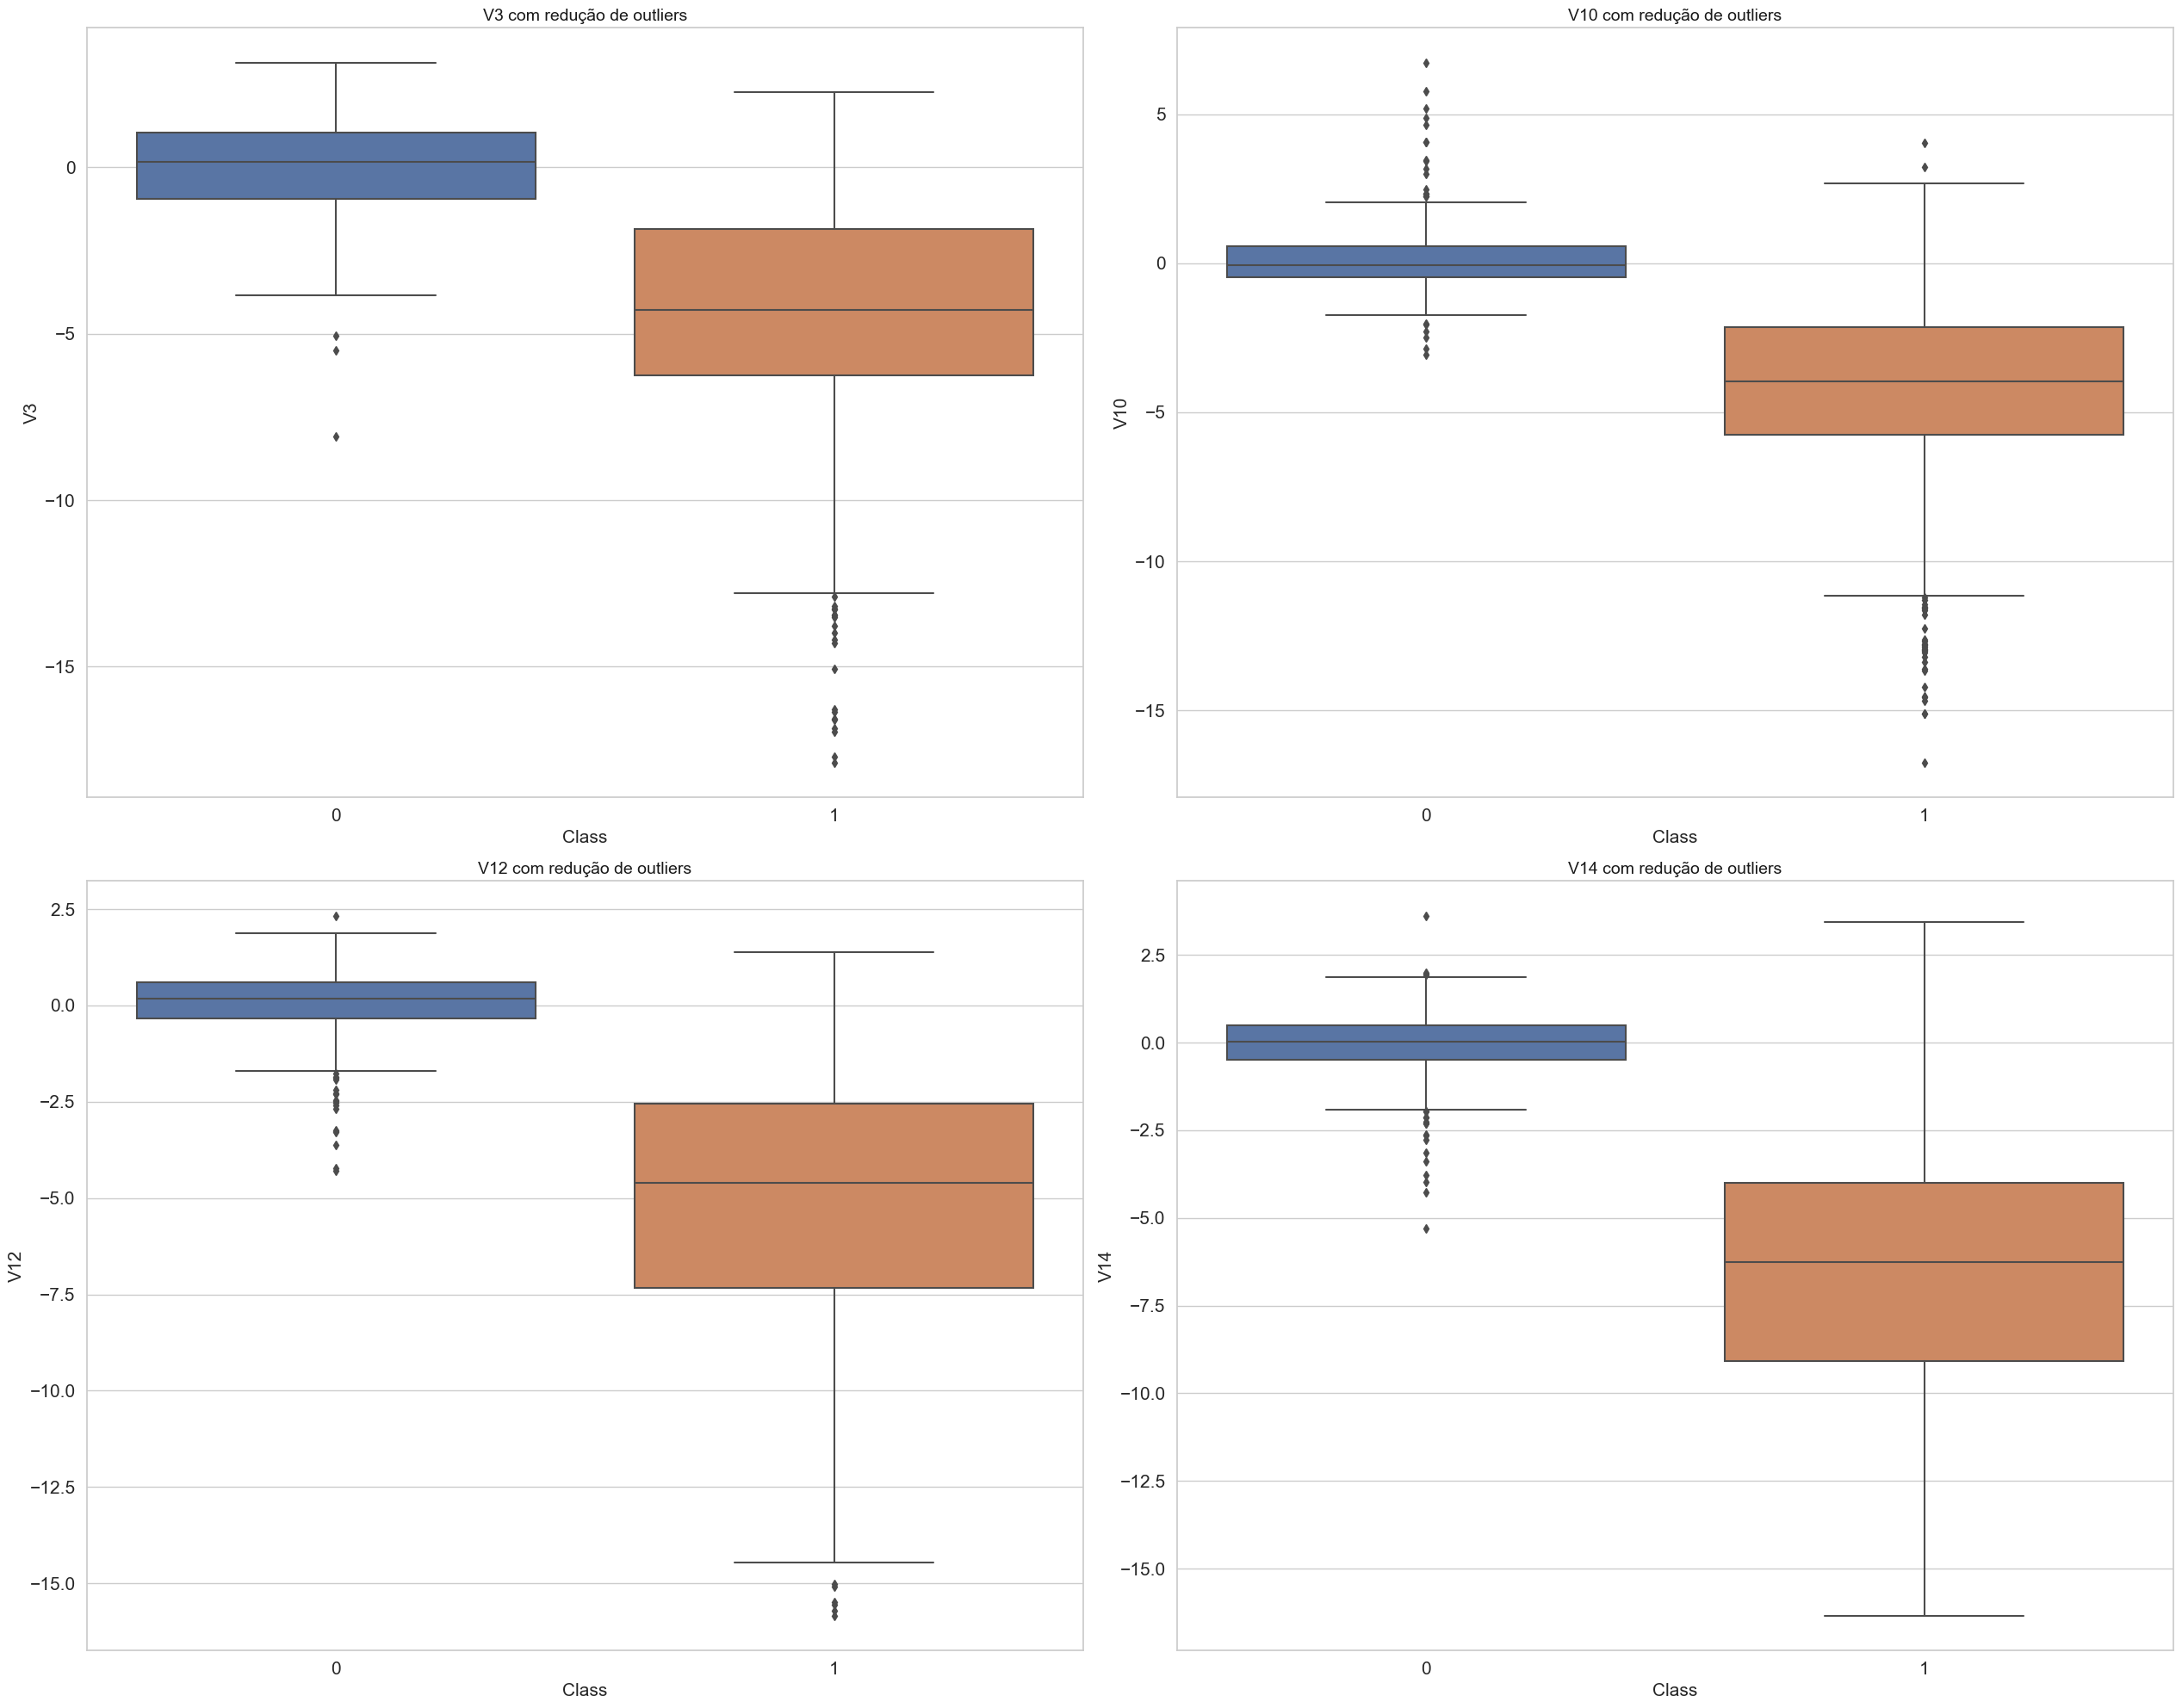

In [29]:
f, ax = plt.subplots(2,2, figsize=(25.5, 20))

sns.boxplot(x="Class", y="V3", data=data_novos,ax=ax[0][0])
ax[0][0].set_title("V3 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V10", data=data_novos,ax=ax[0][1])
ax[0][1].set_title("V10 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V12", data=data_novos,ax=ax[1][0])
ax[1][0].set_title("V12 com redução de outliers", fontsize=14)

sns.boxplot(x="Class", y="V14", data=data_novos,ax=ax[1][1])
ax[1][1].set_title("V14 com redução de outliers", fontsize=14)

plt.tight_layout()

Após o procedimento de remoção de outliers, é possível observar que ainda há presença de outliers, porém em uma quantidade significativamente menor. Além disso, os valores máximos e mínimos agora estão mais condizentes com a distribuição original dos dados, refletindo uma representação mais fidedigna das variáveis.

Para a próxima etapa, empregaremos três modelos de redução de dimensionalidade com o objetivo de tentar discernir entre as transações com fraude e sem fraude, com base em seus padrões distintos. Os modelos escolhidos são o t-SNE (t-distributed Stochastic Neighbor Embedding), conhecido por sua eficácia mesmo em amostras pequenas, além do PCA (Principal Component Analysis) e o TruncatedSVD (Truncated Singular Value Decomposition).